In [1]:
import pandas as pd
ix = pd.IndexSlice

from utils import *
import shared_utils

from siuba import *

DATA_PATH = f"{GCS_FILE_PATH}test/"

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# service_combined = pd.read_parquet(f"{DATA_PATH}service_increase.parquet")
hours_by_operator = pd.read_parquet(f"{DATA_PATH}increase_by_operator.parquet")
hours_by_operator.head()

addl_service_hrs_annual  additional_buses  \
calitp_itp_id tract_type                                              
4             rural                  0.000000e+00          0.000000   
              suburban               5.747733e+04         23.477447   
              urban                  2.397386e+06        979.247059   
6             urban                  1.619020e+04          6.613121   
10            rural                  2.219360e+04          9.065296   

                             bus_capex  bus_capex_annualized  
calitp_itp_id tract_type                                      
4             rural       0.000000e+00          0.000000e+00  
              suburban    1.824059e+07          1.302899e+06  
              urban       7.608172e+08          5.434408e+07  
6             urban       5.138005e+06          3.670003e+05  
10            rural       7.043200e+06          5.030857e+05

### Bus Capital Expenditures

In [3]:
ntd_joined = pd.read_parquet(f'{GCS_FILE_PATH}vehicles_ntd_joined.parquet')

<AxesSubplot:xlabel='total_vrh', ylabel='vrh_per_bus'>

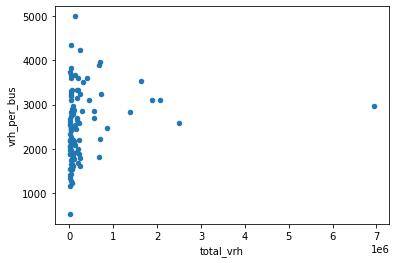

In [4]:
ntd_joined[['total_vrh', 'vrh_per_bus']].plot(x='total_vrh', 
                                              y='vrh_per_bus', kind='scatter')

In [5]:
ntd_joined >> arrange(-_.vrh_per_bus)

,calitp_itp_id,ntd_id,_5311_funds,bus,artic_bus,otr_bus,dbl_deck_bus,trolleybus,Agency,total_vrh,total_buses,vrh_per_bus
58,343,90173,"$1,046,040",23,0,0,0,0,Transit Joint Powers Authority for Merced Coun...,114903,23,4995.782609
92,198,9R02-91047,"$696,482",9,0,0,0,0,Mendocino Transit Authority,39040,9,4337.777778
69,14,90211,$0,55,0,0,0,0,Anaheim Transportation Network,232611,55,4229.290909
20,269,90031,"$478,221",173,0,0,0,0,Riverside Transit Agency,686321,173,3967.173410
18,232,90029,$0,159,15,0,0,0,Omnitrans,676045,174,3885.316092
...,...,...,...,...,...,...,...,...,...,...,...,...
95,231,9R02-91058,"$669,616",6,0,0,0,0,City of Ojai,8041,6,1340.166667
97,99,9R02-91062,"$376,473",32,0,0,0,0,Eastern Sierra Transit Authority,40516,32,1266.125000
65,105,90205,$0,46,0,0,0,0,City of Elk Grove,55961,46,1216.543478
89,117,9R02-91007,"$1,522,098",15,0,0,0,0,Fresno County Rural Transit Agency,17355,15,1157.000000


### Methodology notes

* filtered to buses
* all 2019 NTD data
* using 12 year useful life
* bus cost:
    * based on CARB Innovative Clean Transit cost model for a 40', 550kWh electric bus in 2022
    * Inclusive of charger and maintenance infrastructure upgrades, but not potential land aquisition costs for expanded facilities.

In [6]:
hours_by_operator.groupby('tract_type').sum()

,addl_service_hrs_annual,additional_buses,bus_capex,bus_capex_annualized
tract_type,,,,
rural,5.917595e+06,2417.127030,1.877965e+09,1.341404e+08
suburban,1.867860e+06,762.954357,5.927705e+08,4.234075e+07
urban,3.195935e+07,13054.259301,1.014239e+10,7.244564e+08


In [7]:
hours_by_operator.sum()

addl_service_hrs_annual    3.974481e+07
additional_buses           1.623434e+04
bus_capex                  1.261312e+10
bus_capex_annualized       9.009375e+08
dtype: float64

In [8]:
ix = pd.IndexSlice
hours_by_operator.loc[ix[279,:]]

,addl_service_hrs_annual,additional_buses,bus_capex,bus_capex_annualized
tract_type,,,,
urban,501460.266667,204.828686,1.591398e+08,1.136713e+07


### Sandbox

In [9]:
# tbl.transitstacks.provider_info() >> select(_.calitp_itp_id == _.itp_id, _.ntd_id) >> collect() >> inner_join(_, ntd_joined, on='ntd_id')